# 1) Load the data

In [139]:
import pandas as pd 

train = pd.read_csv("train.csv", sep=',', decimal=b'.', encoding='utf-8')
# cols = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Cabin", "Embarked", "Survived"]
# train = train[cols]
# train['Sex'].replace('female',0,inplace=True)
# train['Sex'].replace('male',1,inplace=True)

In [140]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [141]:
test = pd.read_csv("test.csv", sep=',', decimal=b'.', encoding='utf-8')
# cols = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"]
# test = test[cols]

In [142]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [143]:
passengerid = test.PassengerId

# 2) Feature analysis

## 2.1) Merge train and test

In [144]:
len(train)

891

In [145]:
len(test)

418

In [146]:
alle = pd.concat([train,test])

/home/biro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


## 2.2) Analyse the data and the features

In [147]:
alle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


Some values are missing.

In [148]:
alle.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


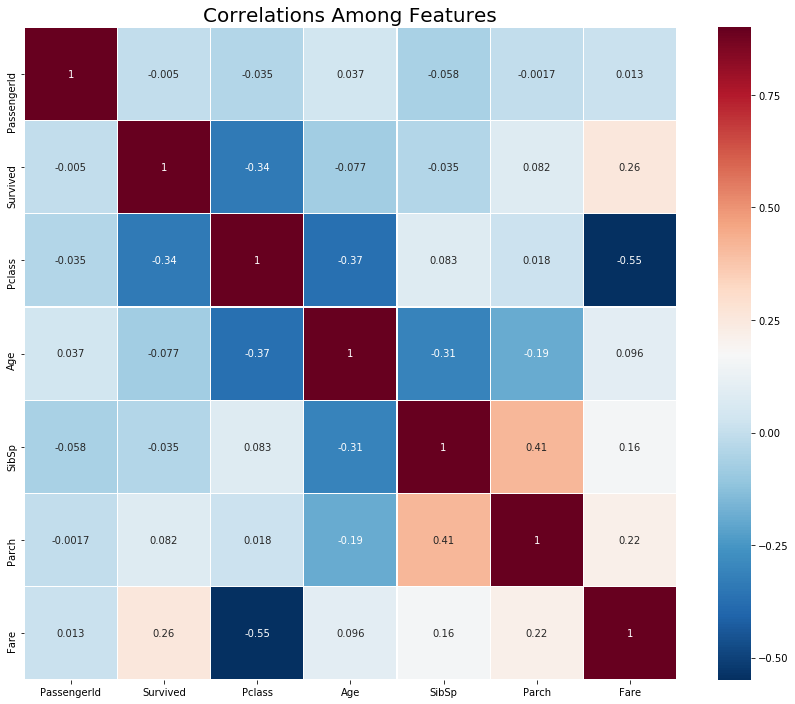

In [149]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize = (15,12))
sns.heatmap(train.corr(), 
            annot=True,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20);

### 2.2.1) Leave unecessary features.

In [150]:
# Leave ['Ticket','PassengerId']
alle = alle.drop(['Ticket','PassengerId', 'Name'], axis=1)

### 2.2.2) Modify features.

In [151]:
alle['Sex'].replace(['female','male'],[0,1],inplace=True)

### 2.2.3) Dealing with missing values.

#### Embarked 

In [152]:
percent = pd.DataFrame(round(alle.Embarked.value_counts(dropna=False, normalize=True)*100,2))

total = pd.DataFrame(alle.Embarked.value_counts(dropna=False))

total.columns = ["Total"]
percent.columns = ['Percent']
pd.concat([total, percent], axis = 1)

,Total,Percent
S,914,69.82
C,270,20.63
Q,123,9.40
NaN,2,0.15


In [153]:
alle[alle['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
61,38.0,B28,NaN,80.0,0,1,0,0,1.0
829,62.0,B28,NaN,80.0,0,1,0,0,1.0


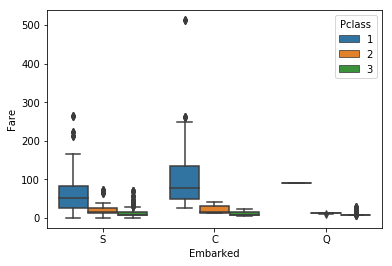

In [154]:
sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=alle, width=0.8)

In [155]:
alle.Embarked.fillna("C", inplace=True)

#### Fare 

In [156]:
alle[alle['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
152,60.5,NaN,S,NaN,0,3,1,0,NaN


In [157]:
miss_val = alle[(alle.Pclass == 3) & (alle.Embarked == "S") & (alle.Sex == 1)].Fare.mean()
## replace the test.fare null values with test.fare mean
alle.Fare.fillna(miss_val, inplace=True)

#### Cabin

In [158]:
alle.Cabin.fillna("N", inplace=True)

In [159]:
alle.Cabin = [i[0] for i in alle.Cabin]

In [160]:
#with_N = alle[alle.Cabin == "N"]

#without_N = alle[alle.Cabin != "N"]

cab_means = dict(alle.groupby("Cabin")['Fare'].mean().sort_values())
cab_means_l = list(alle.groupby("Cabin")['Fare'].mean().sort_values())
del cab_means_l[2]

In [162]:
for i in range(len(alle)):
    if alle['Cabin'].iloc[i] == 'N':
        for cab, mean in cab_means.items():
                if mean == min(cab_means_l, key=lambda x:abs(x-alle['Fare'].iloc[i])):
                    alle['Cabin'].iloc[i] = cab

/home/biro/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


#### Age

In [164]:
# from sklearn.ensemble import RandomForestRegressor

# # writing a function that takes a dataframe with missing values and outputs it by filling the missing values. 
# def completing_age(df):
#     # getting all the features except Survived
#     age_df = df.loc[:,:'SibSp'] 
    
#     temp_train = age_df.loc[age_df.Age.notnull()] # df with age values
#     temp_test = age_df.loc[age_df.Age.isnull()] # df without age values
    
#     y = temp_train.Age.values # setting target variables(age) in y 
#     x = temp_train.loc[:,'Cabin':].values
    
#     rfr = RandomForestRegressor(n_estimators=1500, n_jobs=-1)
#     rfr.fit(x, y)
    
#     predicted_age = rfr.predict(temp_test.loc[:,'Cabin':])
    
#     df.loc[df.Age.isnull(), "Age"] = predicted_age
    

#     return df
 
# completing_age(alle)

# 3) Feature Engineering

## 3.1) Creating new features

### family_size feature

In [165]:
alle['family_size'] = alle.SibSp + alle.Parch+1

### family_group 

In [166]:
def family_group(size):
    a = ''
    if (size <= 1):
        a = 'lonely'
    elif (size <= 4):
        a = 'small'
    else:
        a = 'large'
    return a

In [167]:
alle['family_group'] = alle['family_size'].map(family_group)

### calculated_fare feature

In [168]:
alle['calculated_fare'] = alle.Fare/alle.family_size

### fare_group

In [169]:
def fare_group(fare):
    a= ''
    if fare <= 4:
        a = 'Very_low'
    elif fare <= 10:
        a = 'low'
    elif fare <= 20:
        a = 'mid'
    elif fare <= 45:
        a = 'high'
    else:
        a = "very_high"
    return a

alle['fare_group'] = alle['calculated_fare'].map(fare_group)

## 3.2) Creating dummy variables

In [170]:
alle = pd.get_dummies(alle, columns=['Pclass', 'Cabin','Embarked', 'family_group', 'fare_group'], drop_first=False)
alle.drop(['family_size','Fare','calculated_fare'], axis=1, inplace=True)

### Turn back to 2.2.3) Age

In [171]:
from sklearn.ensemble import RandomForestRegressor

# writing a function that takes a dataframe with missing values and outputs it by filling the missing values. 
def completing_age(df):
    # getting all the features except Survived
    age_df = df.loc[:,:'SibSp'] 
    
    temp_train = age_df.loc[age_df.Age.notnull()] # df with age values
    temp_test = age_df.loc[age_df.Age.isnull()] # df without age values
    
    y = temp_train.Age.values # setting target variables(age) in y 
    x = temp_train.loc[:,'Cabin':].values
    
    rfr = RandomForestRegressor(n_estimators=1500, n_jobs=-1)
    rfr.fit(x, y)
    
    predicted_age = rfr.predict(temp_test.loc[:,'Cabin':])
    
    df.loc[df.Age.isnull(), "Age"] = predicted_age
    

    return df
 
completing_age(alle)

,Age,Parch,Sex,SibSp,Survived,Pclass_1,Pclass_2,Pclass_3,Cabin_A,Cabin_B,...,Embarked_Q,Embarked_S,family_group_large,family_group_lonely,family_group_small,fare_group_Very_low,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high
0,22.000000,0,1,1,0.0,0,0,1,0,0,...,0,1,0,0,1,1,0,0,0,0
1,38.000000,0,0,1,1.0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,26.000000,0,0,0,1.0,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
3,35.000000,0,0,1,1.0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
4,35.000000,0,1,0,0.0,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
5,32.061657,0,1,0,0.0,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
6,54.000000,0,1,0,0.0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
7,2.000000,1,1,3,0.0,0,0,1,0,0,...,0,1,1,0,0,0,0,1,0,0
8,27.000000,2,0,0,1.0,0,0,1,0,0,...,0,1,0,0,1,1,0,0,0,0
9,14.000000,0,0,1,1.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [172]:
# create bins for age
def age_group(age):
    a = ''
    if age <= 1:
        a = 'infant'
    elif age <= 4: 
        a = 'toddler'
    elif age <= 13:
        a = 'child'
    elif age <= 18:
        a = 'teenager'
    elif age <= 35:
        a = 'Young_Adult'
    elif age <= 45:
        a = 'adult'
    elif age <= 55:
        a = 'middle_aged'
    elif age <= 65:
        a = 'senior_citizen'
    else:
        a = 'old'
    return a
        
# Applying "age_group" function to the "Age" column.
alle['age_group'] = alle['Age'].map(age_group)

# Creating dummies for "age_group" feature. 
alle = pd.get_dummies(alle,columns=['age_group'], drop_first=True)

alle.drop('Age', axis=1, inplace=True)

# 4) Splitting the data into original train and test

In [173]:
train = alle.iloc[:891,:]

In [174]:
test = alle.iloc[891:,:]

# 5) Scaling

In [175]:
X = train.drop(['Survived'], axis=1)

In [176]:
y = train['Survived']

In [177]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

normalized_X = preprocessing.normalize(X)

standardized_X = preprocessing.scale(X)

mima = MinMaxScaler(feature_range=(0, 1))
mima_X = mima.fit_transform(X)

/home/biro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by the scale function.
  
/home/biro/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# 6) Modelling

In [178]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size = .33, random_state = 0)

## 6.1) Modells:

### Logistic Regression

In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log = LogisticRegression(C=0.8)
log.fit(train_x,train_y)
y_pred = log.predict(test_x)

print ("Accuracy Score is: {}".format(round(accuracy_score(y_pred, test_y),4)))

/home/biro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy Score is: 0.8068


### Logistic Regression with Gridsearch

In [180]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit

# C_vals is the alpla value of lasso and ridge regression(as alpha increases the model complexity decreases)
C_vals = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,16.5,17,17.5,18]

# Choosing penalties(Lasso(l1) or Ridge(l2))
penalties = ['l1','l2']

# Choose a cross validation strategy. 
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25)

# setting param for param_grid in GridSearchCV. 
param = {'penalty': penalties, 'C': C_vals}

log = LogisticRegression(solver='liblinear')

# Calling on GridSearchCV object. 
grid = GridSearchCV(estimator=LogisticRegression(), param_grid = param, scoring = 'accuracy', n_jobs =-1, cv = cv)
grid.fit(X, y)

/home/biro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.25,
            train_size=None),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 16.5, 17, 17.5, 18]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [181]:
print (grid.best_params_)
print (grid.best_estimator_)

{'C': 1, 'penalty': 'l2'}
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [182]:
# Using the best parameters from the grid-search.
logreg_grid = grid.best_estimator_
print ("Accuracy Score is: {}".format(round(logreg_grid.score(X,y),4)))

Accuracy Score is: 0.8272


### KNN

In [183]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(metric='minkowski', p=2)

cv = StratifiedShuffleSplit(n_splits=10, test_size=.25, random_state=2)

accuracies = cross_val_score(knn, X,y, cv = cv, scoring='accuracy')

print ("Accuracy Score is: {}".format(round(accuracies.mean(),4)))

Accuracy Score is: 0.757


### KNN with Gridsearch

In [184]:
from sklearn.model_selection import GridSearchCV

k_range = range(1,31)
weights_options=['uniform','distance']
param = {'n_neighbors':k_range, 'weights':weights_options}
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
grid = GridSearchCV(KNeighborsClassifier(), param,cv=cv,verbose = False, n_jobs=-1)
 
grid.fit(X,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=False)

In [185]:
print (grid.best_params_)
print (grid.best_estimator_)

{'n_neighbors': 25, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=25, p=2,
           weights='distance')


In [186]:
knn_grid= grid.best_estimator_
print ("Accuracy Score is: {}".format(round(knn_grid.score(X,y),4)))

Accuracy Score is: 0.9035


### Gaussian Naive Bayes

In [187]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(X, y)
y_pred = gaussian.predict(test_x)
gaussian_accy = accuracy_score(y_pred, test_y)
print ("Accuracy Score is: {}".format(round(gaussian_accy,4)))

Accuracy Score is: 0.7424


### Support Vector Machine

In [188]:
from sklearn.svm import SVC
Cs = [0.001, 0.01, 0.1, 1,1.5,2,2.5,3,4,5, 10] ## penalty parameter C for the error term. 
gammas = [0.0001,0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
grid_search = GridSearchCV(SVC(kernel = 'rbf', probability=True), param_grid, cv=cv) ## 'rbf' stands for gaussian kernel
grid_search.fit(X,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [189]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'C': 1.5, 'gamma': 0.1}
SVC(C=1.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [190]:
svm_grid = grid_search.best_estimator_
print ("Accuracy Score is: {}".format(round(svm_grid.score(X,y),4)))

Accuracy Score is: 0.8305


### Decision Tree Classifier

In [191]:
from sklearn.tree import DecisionTreeClassifier
max_depth = range(1,30)
max_feature = [21,22,23,24,25,26,28,29,30,'auto']
criterion=["entropy", "gini"]

param = {'max_depth':max_depth, 'max_features':max_feature, 'criterion': criterion}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid = param, verbose=False, cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),n_jobs = -1)
grid.fit(X, y)

/home/biro/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(1, 30), 'max_features': [21, 22, 23, 24, 25, 26, 28, 29, 30, 'auto'], 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=False)

In [192]:
print (grid.best_params_)
print (grid.best_estimator_)

{'criterion': 'gini', 'max_depth': 15, 'max_features': 25}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=25, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [193]:
dectree_grid = grid.best_estimator_
print ("Accuracy Score is: {}".format(round(dectree_grid.score(X,y),4)))

Accuracy Score is: 0.9035


### Bagging Classifier

In [194]:
from sklearn.ensemble import BaggingClassifier
BaggingClassifier = BaggingClassifier()
BaggingClassifier.fit(X, y)
y_pred = BaggingClassifier.predict(test_x)
bagging_accy = accuracy_score(y_pred, test_y)

print ("Accuracy Score is: {}".format(round(bagging_accy,4)))

Accuracy Score is: 0.9051


### Random Forest Classifier

In [195]:
from sklearn.ensemble import RandomForestClassifier
n_estimators = [90,95,100,105,110]
max_depth = range(1,30)
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

parameters = {'n_estimators':n_estimators, 'max_depth':max_depth}
grid = GridSearchCV(RandomForestClassifier(), param_grid=parameters, cv=cv, n_jobs = -1)
grid.fit(X,y) 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [90, 95, 100, 105, 110], 'max_depth': range(1, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [196]:
print (grid.best_params_)
print (grid.best_estimator_)

{'max_depth': 7, 'n_estimators': 95}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=95, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [197]:
rf_grid = grid.best_estimator_
rf_grid.score(X,y)
print ("Accuracy Score is: {}".format(round(rf_grid.score(X,y),4)))

Accuracy Score is: 0.8676


### Gradient Boosting Classifier

In [198]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gradient = GradientBoostingClassifier()
gradient.fit(X, y)
y_pred = gradient.predict(test_x)
gradient_accy = accuracy_score(y_pred, test_y)

print ("Accuracy Score is: {}".format(round(gradient_accy,4)))

Accuracy Score is: 0.8712


### XGBClassifier

In [199]:
from xgboost import XGBClassifier
XGBClassifier = XGBClassifier()
XGBClassifier.fit(X, y)
y_pred = XGBClassifier.predict(test_x)
XGBClassifier_accy = accuracy_score(y_pred, test_y)

print ("Accuracy Score is: {}".format(round(XGBClassifier_accy,4)))

Accuracy Score is: 0.8508


### AdaBoost Classifier

In [200]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier()
adaboost.fit(X, y)
y_pred = adaboost.predict(test_x)
adaboost_accy = accuracy_score(y_pred, test_y)

print ("Accuracy Score is: {}".format(round(adaboost_accy,4)))

Accuracy Score is: 0.8169


### Extra Trees Classifier

In [201]:
from sklearn.ensemble import ExtraTreesClassifier
ExtraTreesClassifier = ExtraTreesClassifier()
ExtraTreesClassifier.fit(X, y)
y_pred = ExtraTreesClassifier.predict(test_x)
extraTree_accy = accuracy_score(y_pred, test_y)

print ("Accuracy Score is: {}".format(round(extraTree_accy,4)))

Accuracy Score is: 0.9186


/home/biro/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Gaussian Process Classifier 

In [202]:
from sklearn.gaussian_process import GaussianProcessClassifier
GaussianProcessClassifier = GaussianProcessClassifier()
GaussianProcessClassifier.fit(X, y)
y_pred = GaussianProcessClassifier.predict(test_x)
gau_pro_accy = accuracy_score(y_pred, test_y)

print ("Accuracy Score is: {}".format(round(gau_pro_accy,4)))

Accuracy Score is: 0.878


### Voting Classifier

In [203]:
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(estimators=[
    ('logreg_grid', logreg_grid),
    ('svc', svm_grid),
    ('random_forest', rf_grid),
    ('gradient_boosting', gradient),
    ('decision_tree_grid',dectree_grid),
    ('knn_grid', knn_grid),
    ('XGB Classifier', XGBClassifier),
    ('BaggingClassifier', BaggingClassifier),
    ('ExtraTreesClassifier', ExtraTreesClassifier),
    ('gaussian',gaussian),
    ('gaussian process classifier', GaussianProcessClassifier)], voting='soft')

voting_classifier = voting_classifier.fit(train_x,train_y)

y_pred = voting_classifier.predict(test_x)
voting_accy = accuracy_score(y_pred, test_y)

print ("Accuracy Score is: {}".format(round(voting_accy,4)))

/home/biro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy Score is: 0.8237


# 7) Evaluation

In [204]:
all_models = [GaussianProcessClassifier, gaussian, ExtraTreesClassifier, BaggingClassifier, XGBClassifier,knn_grid,  dectree_grid, gradient, rf_grid, svm_grid, logreg_grid, voting_classifier  ]

models = []   
for clf in all_models:
    pred_y = clf.predict(test_x)
    v = [str(clf).rsplit('(', 1)[0],accuracy_score(test_y, pred_y)]
    models.append(v)
    
df_models = pd.DataFrame(models, columns=['Classifier', 'Accuracy'])

In [205]:
df_models

,Classifier,Accuracy
0,GaussianProcessClassifier,0.877966
1,GaussianNB,0.742373
2,ExtraTreesClassifier,0.918644
3,BaggingClassifier,0.905085
4,XGBClassifier,0.850847
5,KNeighborsClassifier,0.918644
6,DecisionTreeClassifier,0.918644
7,GradientBoostingClassifier,0.871186
8,RandomForestClassifier,0.867797
9,SVC,0.820339


In [206]:
df_models.Classifier[df_models.Accuracy == df_models.Accuracy.max()]

2      ExtraTreesClassifier
5      KNeighborsClassifier
6    DecisionTreeClassifier
Name: Classifier, dtype: object

In [207]:
test.drop(['Survived'], axis=1, inplace=True)

/home/biro/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### ExtraTreesClassifier

In [208]:
test_prediction = ExtraTreesClassifier.predict(test)
submission = pd.DataFrame({"PassengerId": passengerid,"Survived": test_prediction})

submission.PassengerId = submission.PassengerId.astype(int)
submission.Survived = submission.Survived.astype(int)

submission.to_csv("titanic1_submission.csv", index=False)

### XGBClassifier

In [211]:
test_prediction = XGBClassifier.predict(test)
submission = pd.DataFrame({"PassengerId": passengerid,"Survived": test_prediction})

submission.PassengerId = submission.PassengerId.astype(int)
submission.Survived = submission.Survived.astype(int)

submission.to_csv("titanic2_submission.csv", index=False)